# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Пропущенные-значения-в-столбцах:" data-toc-modified-id="Пропущенные-значения-в-столбцах:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Пропущенные значения в столбцах:</a></span><ul class="toc-item"><li><span><a href="#Определяем,-в-каких-столбцах-есть-пропуски." data-toc-modified-id="Определяем,-в-каких-столбцах-есть-пропуски.-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Определяем, в каких столбцах есть пропуски.</a></span></li><li><span><a href="#Анализ-пропусков-в-данных:" data-toc-modified-id="Анализ-пропусков-в-данных:-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Анализ пропусков в данных:</a></span></li></ul></li><li><span><a href="#Типы-данных-в-каждом-столбце:" data-toc-modified-id="Типы-данных-в-каждом-столбце:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Типы данных в каждом столбце:</a></span></li><li><span><a href="#Устранение-неявных-дубликатов" data-toc-modified-id="Устранение-неявных-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Устранение неявных дубликатов</a></span></li><li><span><a href="#Находим-и-устраняем-редкие-и-выбивающиеся-значения." data-toc-modified-id="Находим-и-устраняем-редкие-и-выбивающиеся-значения.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Находим и устраняем редкие и выбивающиеся значения.</a></span></li></ul></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу новые столбцы</a></span><ul class="toc-item"><li><span><a href="#Добавили-в-таблицу-новые-столбцы-со-следующими-параметрами:" data-toc-modified-id="Добавили-в-таблицу-новые-столбцы-со-следующими-параметрами:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Добавили в таблицу новые столбцы со следующими параметрами:</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Как-быстро-продавались-квартиры-или-сколько-дней-было-размещено-каждое-объявление?" data-toc-modified-id="Как-быстро-продавались-квартиры-или-сколько-дней-было-размещено-каждое-объявление?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Как быстро продавались квартиры или сколько дней было размещено каждое объявление?</a></span></li><li><span><a href="#Определяем-какой-фактор-больше-всего-влияет-на-общую-(полную)-стоимость-объекта." data-toc-modified-id="Определяем-какой-фактор-больше-всего-влияет-на-общую-(полную)-стоимость-объекта.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Определяем какой фактор больше всего влияет на общую (полную) стоимость объекта.</a></span></li><li><span><a href="#&quot;Cчитаем-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений.-Выделяем-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-квадратного-метра." data-toc-modified-id="&quot;Cчитаем-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений.-Выделяем-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-квадратного-метра.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>"Cчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделяем населённые пункты с самой высокой и низкой стоимостью квадратного метра.</a></span></li><li><span><a href="#Вычисление-средней-цены-каждого-километра.-Опишите,-как-стоимость-объектов-зависит-от-расстояния-до-центра-города." data-toc-modified-id="Вычисление-средней-цены-каждого-километра.-Опишите,-как-стоимость-объектов-зависит-от-расстояния-до-центра-города.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Вычисление средней цены каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импорт библиотек

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# чтение файла и вывод информации о датафрейме

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\\t', engine='python', parse_dates=['first_day_exposition'])
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\\t', engine='python')
else:
    print('Данные загружены успешно!')

Данные загружены успешно!


Столкнулся в работе с ошибкой

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avr_area'] = data['total_area'].apply(categorize_area)
  
  
Пробовал заменить сокращенную запись логической индексации на полную: `data['xxx'] на data.loc[:,'xxx']`, но это не помогает, поэтому ввожу следующее: `pd.set_option('mode.chained_assignment', None)`
  

In [3]:
pd.set_option('mode.chained_assignment', None)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Предобработка данных

#### Пропущенные значения в столбцах:

##### Определяем, в каких столбцах есть пропуски.


In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
pd.DataFrame(data.isna().mean()*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
is_apartment,88.290645
parks_nearest,65.909954
ponds_nearest,61.559559
balcony,48.605426
ceiling_height,38.799105
airports_nearest,23.384953
cityCenters_nearest,23.287902
parks_around3000,23.283683
ponds_around3000,23.283683
days_exposition,13.422507


##### Анализ пропусков в данных:

Всего `23699` записей, пропусков много

*Заполним нулём там, где значение не указано и логчино предположить, что можно заполнить как 0:*
- balcony (11519) - его скорее всего нет, раз поле не заполнено
- parks_around3000 (5518) - его скорее всего нет, раз поле не заполнено
- ponds_around3000 (5518) - его скорее всего нет, раз поле не заполнено
- is_apartment (20924) - предполагаем, что раз не заполнено, значит False (не апартаменты), многие просто не знакомы с таким термином и критериям отнесения к апартаментам

*Исключим записи, гда порущено:*
- locality_name (49) - незначительное количество, предположительно случайных пропуском -  можно удалять.


*Для пользовательских катагорий логичную замену предложить невозможно - оставляем пустыми:*
- ceiling_height (9195) - высоту часто не указывают, т.к. просто не знают или слишком маленькая, что снижает привлекательность 
- floors_total (86) - полагаю, что это случайные пропуски в незначительном количестве
- living_area (1903) - сложно предложить логичную замену, видимо просто ошибка в данных
- kitchen_area (2278) - сложно предложить логичную замену, видимо просто ошибка в данных 
- days_exposition (3181) - сложно предложить логичную замену, видимо просто ошибка в данных 

*Аналогично для картографических*
- cityCenters_nearest (5519) - лучше оставить пустым и обратиться к поставщику данных за уточнением, параметр важен для анализа
- airports_nearest (5542) - много, но для задачи анализа влияния не имеет
- parks_nearest (15620) - много, но для задачи анализа влияния не имеет
- ponds_nearest (14589) - много, но для задачи анализа влияния не имеет


О причинах пропусков судить сложно. 
Например для "картографических" полей - ведь в базе не приводится адрес объекта недвижимости, только населенный пункт - можно предположить в таком случае, что парков и прудов поблизости нет.
Пользовательские данные скорее всего не внесены случайно, от незнания или специально, т.к. могут понизить стоимость.

In [8]:
# указываем количество балконов, парков и прудов 0, там где пропуски 

data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(0)
data['floors_total'] = data['floors_total'].fillna(0)

# исключаем 49 записей, где не указана локация

data = data[~data['locality_name'].isna()]

#### Типы данных в каждом столбце:

Меняем тип данных для трёх колонок, исходя из последующих задач:

first_day_exposition нужно привести к datatime, чтобы в дальнейшем извлечь дни, месяцы и года
is_apartment к boolean, т.к. это двоичный атрибут как например studio, а
floors_total приводим к целому, это потребуется для вычислений

In [9]:
# признак апартаментов булеан, этажность дома целое число

data['is_apartment'] = data['is_apartment'].astype('bool')
data['floors_total'] = data['floors_total'].astype('int')

# Перевод из строки в дату и время
#data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Устранение неявных дубликатов

Анализ уникальных значения наименования локаций, показал как минимум 3 закономерности:
1. Двоякое написание "поселок" и "посёлок" - меняем везде на вариант с Ё
2. "городской посёлок" и "посёлок городского типа" это одно и тоже - будем использовать второй вариант
3. "посёлок станции" и "поселок при железнодорожной станции" эквивалентны - используем более короткую версию. 

Произведем соответствующие замены

In [10]:
# устраняем неявные дубликаты в названии населенных пунктов заменой некоторых слов

data['locality_name'].replace('поселок','посёлок', inplace=True, regex=True)
data['locality_name'].replace('городской посёлок','посёлок городского типа', inplace=True, regex=True)
data['locality_name'].replace('посёлок при железнодорожной станции','посёлок станции', inplace=True, regex=True)

In [11]:
# проверка наличия полных дублей

data.duplicated().sum()

0

#### Находим и устраняем редкие и выбивающиеся значения. 

Методом `describe()` смотрим, на что следует обратить внимание. Подозрение вызывают следующие поля:

- ceiling_height - слишком высокие значения
- last_price - очень дешевые предложения
- living_area - очень низкие значения
- kitchen_area - очень низкие значения
- rooms - нулевое значение комнат для нестудий

In [12]:
def height_cut(h):
    if h >= 20:
        h /= 10
    return h

data['ceiling_height'] = data['ceiling_height'].apply(height_cut)

In [13]:
# исключаем подозрительно высокие более 6 метров - 7 шт и ниже нормы в 2,4 метра - 23 шт. 
# От 3 до 6 метров оставляем, считаем элитным жильём

data = data[~(data['ceiling_height'] > 6)]
data = data[~(data['ceiling_height'] < 2.4)]

Text(0, 0.5, 'Количество объектов недвижимости')

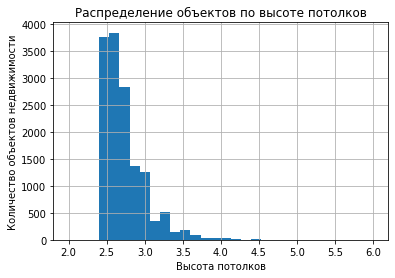

In [14]:
# посмотрим распределение объектов по высоте потолков

data['ceiling_height'].hist(bins=30, range=(2.0,6))
plt.title('Распределение объектов по высоте потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объектов недвижимости')


Аномалии по высоте потолков обработаны. Из графика видно, что средние значения 2.4 - 3.0, выше 3.0 можно отнести к элитному жилью. Чем выше потолок, тем меньше объектов, все логично.

In [15]:
# аномально низкое значение общей цены умножаем на 1000, исходя из предположения, что эта цена указана в тысячах рублей.

for s in data['last_price']:
    if s < 20000:
        data['last_price'].replace(s,s*1000, inplace=True, regex=True)

Text(0, 0.5, 'Количество объектов недвижимости')

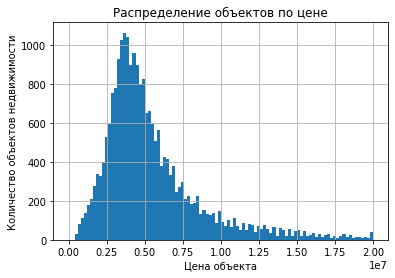

In [16]:
data['last_price'].hist(bins=100, range=(0,20000000))

plt.title('Распределение объектов по цене')
plt.xlabel('Цена объекта')
plt.ylabel('Количество объектов недвижимости')

Распределение цены нормальное, средние значения от 2.5 до 5 миллионов. Еслть "хвост" вправо - это дорогой сегмент, по нему количество стремится к 0. Все выглядит логично, считаем, что выбросы обработаны.

In [17]:
# природа аномалии низкими значениями жилой площади непонятна данные действительно искажены - убираем самые маленькие значения
# ограничение 14 взято в соответствии с СНиП 31-01-2003

data = data[~(data['living_area'] < 14)]

Text(0, 0.5, 'Количество объектов недвижимости, шт.')

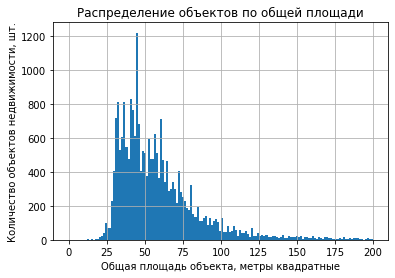

In [18]:
data['total_area'].hist(bins=150, range=(0,200))

plt.title('Распределение объектов по общей площади')
plt.xlabel('Общая площадь объекта, метры квадратные')
plt.ylabel('Количество объектов недвижимости, шт.')

В целом график выглядит логично, есть пик на 45 метрах квадратных, но это нормально, в целом это близко к медиане.

Text(0, 0.5, 'Жилая площадь объекта, метры квадратные')

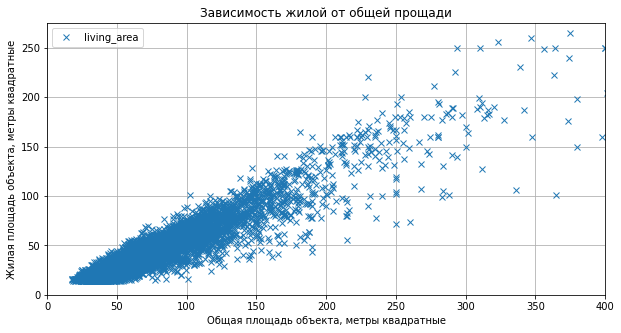

In [19]:
# Зависимость жилой от общей прощади

data.plot(x='total_area', y='living_area', style='x', xlim=(0, 400), ylim=(0,275), grid=True, figsize=(10, 5))

plt.title('Зависимость жилой от общей прощади')
plt.xlabel('Общая площадь объекта, метры квадратные')
plt.ylabel('Жилая площадь объекта, метры квадратные')

Есть закономерность - с увеличением общей площади квартиры, увеличивается и жилая.
Аномальных отклонений тут не выявлено

In [20]:
# исключим записи с анамально маленьким значением площади кухни

data = data[~(data['kitchen_area'] < 4)]

In [21]:
# ввели категорию общей площади

def categorize_area(row):
    try:
        if row <= 28.0:
            return 'маленькая'
        elif 28.0 < row <= 55.0:
            return 'средняя'
        elif 55.0 < row <= 100.0:
            return 'большая'
        elif 100.0 < row <= 150.0:
            return 'очень большая'
        elif row > 150.0:
            return 'огромная'
    except:
        return 'нет категории по площади'

In [22]:
# добавим столбец с категорией площади и смотрим медианное значение количества комнат

data.loc[:,'avr_area'] = data.loc[:,'total_area'].apply(categorize_area)

In [23]:
data.pivot_table(index='avr_area', values='rooms', aggfunc=['count', 'median'])

,count,median
,rooms,rooms
avr_area,,
большая,8724,3
маленькая,376,1
огромная,562,5
очень большая,1267,3
средняя,12345,1


In [24]:
# там, где кол-во комнат было 0, указываем медианное значение по категории площади
#pd.set_option('mode.chained_assignment', None)

for t in data.loc[:,'avr_area'].unique():
    data.loc[(data.loc[:,'avr_area'] == t) & (data.loc[:,'rooms'] == 0) & (data.loc[:,'studio'] == False), 'rooms'] = \
    data.loc[(data.loc[:,'avr_area'] == t), 'rooms'].median()

In [25]:
# исключаем из анализа предложения, где комнат больше 6 шт.

data = data[~(data['rooms'] > 6)]

In [26]:
# проверим себя

print(len(data))

data[['last_price', 'total_area','rooms', 'ceiling_height']].describe().loc[['min', 'max']]

23184


,last_price,total_area,rooms,ceiling_height
min,430000.0,13.0,0.0,2.4
max,401300000.0,507.0,6.0,6.0


### Посчитайте и добавьте в таблицу новые столбцы

#### Добавили в таблицу новые столбцы со следующими параметрами:

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [27]:
# добавляем столбец с ценой квадратного метра

data.loc[:,'price_per_sqtm'] = data.loc[:,'last_price'] / data.loc[:,'total_area']
data['price_per_sqtm'].describe()

count    2.318400e+04
mean     9.907539e+04
std      4.855562e+04
min      7.962963e+03
25%      7.647059e+04
50%      9.485331e+04
75%      1.140016e+05
max      1.736842e+06
Name: price_per_sqtm, dtype: float64

<AxesSubplot:>

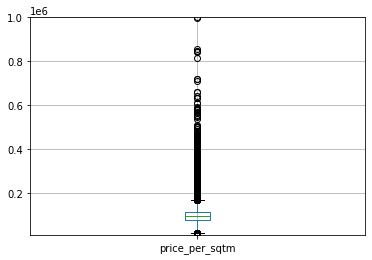

In [28]:
import matplotlib.pyplot as plt 

plt.ylim(10**4, 10**6)
plt.xlim(0, 2) 

data.boxplot('price_per_sqtm')

Text(0, 0.5, 'Количество объектов')

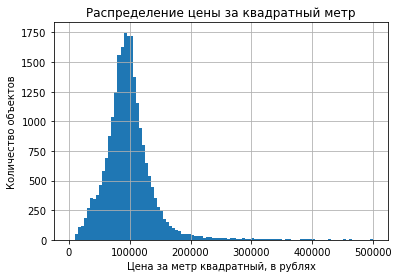

In [29]:
data.hist('price_per_sqtm', bins=100, range=(0,500000))

plt.title('Распределение цены за квадратный метр')
plt.xlabel('Цена за метр квадратный, в рублях')
plt.ylabel('Количество объектов')

Цена за метр распределена нормально, выбросов нет. В целом график повторяет график по общей стоимости.

In [30]:
# ввели категорию цены за квадрат

def categorize_price(row):
    try:
        if row <= 70000:
            return 'эконом'
        elif 70000 < row <= 130000:
            return 'комфорт'
        elif 130000 < row <= 300000:
            return 'бизнес'
        elif 300000 < row <= 600000:
            return 'премиум'
        elif row > 600000:
            return 'элитная'
    except:
        return 'нет категории по цене квадратного метра'

In [31]:
data.loc[:,'price_cat'] = data.loc[:,'price_per_sqtm'].apply(categorize_price)

In [32]:
data['price_cat'].value_counts()

комфорт    15558
эконом      4444
бизнес      3020
премиум      143
элитная       19
Name: price_cat, dtype: int64

In [33]:
# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data.loc[:,'day_public'] = data.loc[:,'first_day_exposition'].dt.weekday

# месяц публикации объявления
data.loc[:,'month_public'] = data.loc[:,'first_day_exposition'].dt.month

# год публикации объявления
data.loc[:,'year_public'] = data.loc[:,'first_day_exposition'].dt.year

In [34]:
# тип этажа квартиры (значения — «первый», «последний», «другой»)

def function(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data.loc[:,'floor_cat'] = data.apply(function, axis=1)

In [35]:
# расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

data['centr_km'] = (data['cityCenters_nearest']/1000)

In [36]:
data['centr_km'] = (data[data['centr_km'].notnull()]['centr_km']).astype('int')

### Исследовательский анализ данных

#### Анализ данных

Text(0, 0.5, 'Количество объектов')

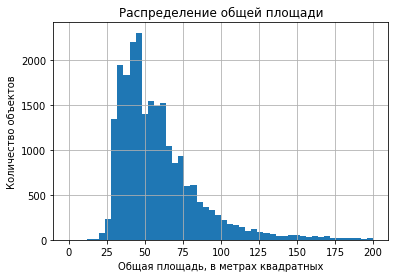

In [37]:
# гисторамма общей площади

data.hist('total_area', bins=50, range=(0, 200))

plt.title('Распределение общей площади')
plt.xlabel('Общая площадь, в метрах квадратных')
plt.ylabel('Количество объектов')

- общая площадь - наиболее частое значение в диапазоне от 30 до 50 м2- скорее всего это однокомнатные квартиры и студии их больше всего, при этом есть объекты очень большой площади - из количество логично уменьшается с увеличением площади; 

Text(0, 0.5, 'Количество объектов')

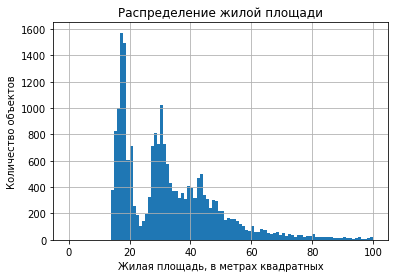

In [38]:
# жилая площадь
data.hist('living_area', bins=100, range=(0, 100))

plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь, в метрах квадратных')
plt.ylabel('Количество объектов')

- жилая площадь - ярко выражены три пика 18, 30 и 50 м2, можно предположить, что это характерно для самых массовых категорий: однокомнатные, двухкомнатные и трёхкомнатные квартиры;

Text(0, 0.5, 'Количество объектов')

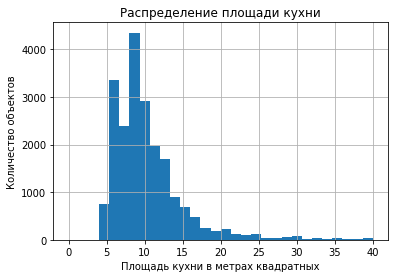

In [39]:
#площадь кухни;
data.hist('kitchen_area', bins=30, range=(0, 40))

plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни в метрах квадратных')
plt.ylabel('Количество объектов')

- площадь кухни - большинство кухонь небольшие - в диапазоне от 5 до 10 метров;

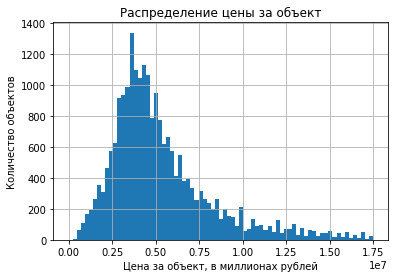

Text(0, 0.5, 'Количество объектов')

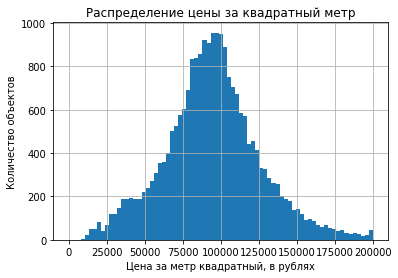

In [40]:
#цена объекта;
data.hist('last_price', bins=75, range=(0, 17500000))
plt.title('Распределение цены за объект')
plt.xlabel('Цена за объект, в миллионах рублей')
plt.ylabel('Количество объектов')

plt.show()

data.hist('price_per_sqtm', bins=75, range=(0, 200000))
plt.title('Распределение цены за квадратный метр')
plt.xlabel('Цена за метр квадратный, в рублях')
plt.ylabel('Количество объектов')

- цена объекта - большинство объектов имеет стоимость от 2,5 до 5 млн. рублей;

Text(0, 0.5, 'Количество объектов')

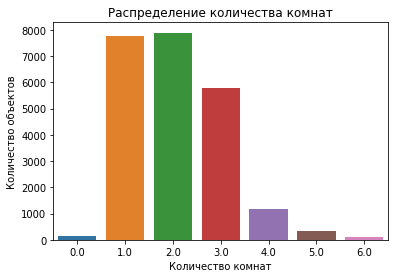

In [41]:
# количество комнат;
sns.countplot(x=data['rooms'])

plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов')



- количество комнат - больше всего однокомнатных и двухкомнатных почти по 8000, трёшек меньше 6000. Ноль комнат характерно для студий, их совесем мало. Также чем больше комнат, тем реже встречается объект;

Text(0, 0.5, 'Количество объектов')

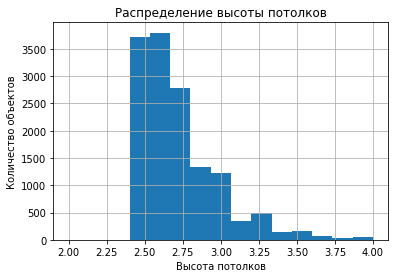

In [42]:
# высота потолков;
data.hist('ceiling_height', bins=15, range=(2, 4))

plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объектов')

- высота потолков - в основном стандартные, около 2,5 метров, в дорогих объектах встречаются очень высокие;

Text(0, 0.5, 'Количество объектов')

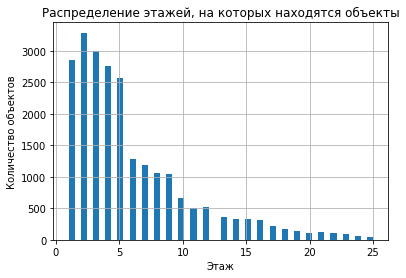

In [43]:
# этаж квартиры;

data.hist('floor', bins=50, range=(1, 25))

plt.title('Распределение этажей, на которых находятся объекты')
plt.xlabel('Этаж')
plt.ylabel('Количество объектов')

- этаж квартиры - в большинстве этаж с 1 по 5;

Text(0, 0.5, 'Количество объектов')

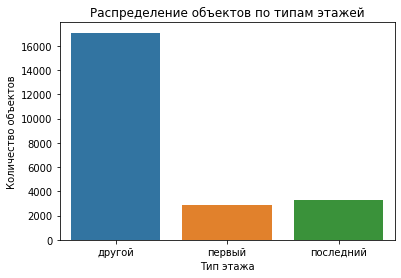

In [44]:
# тип этажа квартиры («первый», «последний», «другой»);

sns.countplot(x=data['floor_cat'])

plt.title('Распределение объектов по типам этажей')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объектов')

- тип этажа квартиры («первый», «последний», «другой») - перый и последний встречаются реже - по 2000 объектов, другие этажи 16000;

Text(0, 0.5, 'Количество объектов')

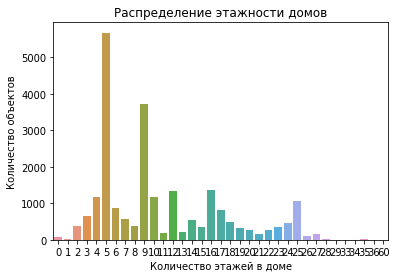

In [45]:
# общее количество этажей в доме;
sns.countplot(x=data['floors_total'])

plt.title('Распределение этажности домов')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объектов')

- общее количество этажей в доме - в основном это 5ти и 9ти этажные дома;

Text(0, 0.5, 'Количество объектов')

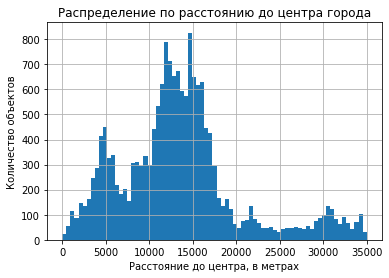

In [46]:
# расстояние до центра города в метрах;

data.hist('cityCenters_nearest', bins=75, range=(0, 35000))

plt.title('Распределение по расстоянию до центра города')
plt.xlabel('Расстояние до центра, в метрах')
plt.ylabel('Количество объектов')

- расстояние до центра города в метрах - 10-15 км - удаленность от центра большинства объектов;

Text(0, 0.5, 'Количество объектов')

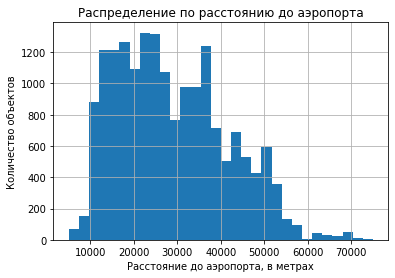

In [47]:
# расстояние до ближайшего аэропорта;

data.hist('airports_nearest', bins=30, range=(5000, 75000))
plt.title('Распределение по расстоянию до аэропорта')
plt.xlabel('Расстояние до аэропорта, в метрах')
plt.ylabel('Количество объектов')

- расстояние до ближайшего аэропорта - в основном от 10 до 40 км;

Text(0, 0.5, 'Количество объектов')

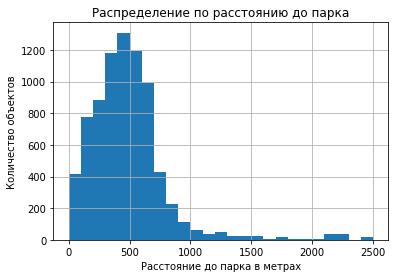

In [48]:
# расстояние до ближайшего парка;

data.hist('parks_nearest', bins=25, range=(0, 2500))
plt.title('Распределение по расстоянию до парка')
plt.xlabel('Расстояние до парка в метрах')
plt.ylabel('Количество объектов')

- расстояние до ближайшего парка - зачастую парк есть в пределах 750 метров;

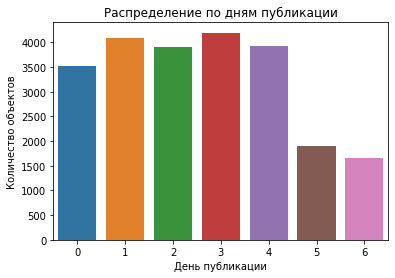

Text(0, 0.5, 'Количество объектов')

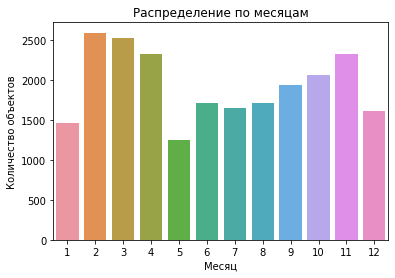

In [49]:
sns.countplot(x=data['day_public'])
plt.title('Распределение по дням публикации')
plt.xlabel('День публикации')
plt.ylabel('Количество объектов')

plt.show()

sns.countplot(x=data['month_public'])
plt.title('Распределение по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество объектов')

- день и месяц публикации объявления - зачастую объявления размещают по будням, по выходным реже. январь, май и декабрь наименее популярные месяца, а в феврале, марте и апреле пиковые значения, с лета до декабря количество объявлений планомерно увеличивается.

#### Как быстро продавались квартиры или сколько дней было размещено каждое объявление?

среднее значение - 181 день
медианное значение - 95 дней

Медиана в два раза меньше среднего значения - обуславливается длинным хвостом диаграммы вправо - более 3000 объектов были выставлены более года (если не брать их в рассчет, то среднее = 104, медиана = 74).

Объекты проданные меньше, чем за 45 дней можно считать быстрыми; дольше 232 дней - долгими

Text(0, 0.5, 'Количество объектов')

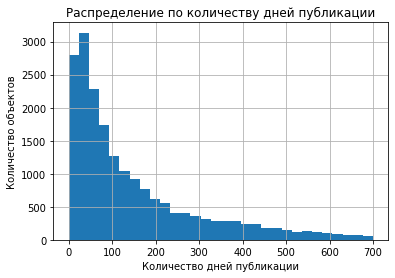

In [50]:
data['days_exposition'].hist(bins=30, range=(0,700))

plt.title('Распределение по количеству дней публикации')
plt.xlabel('Количество дней публикации')
plt.ylabel('Количество объектов')

Количество опубликованных объявлений закономерно уменьшается со временем, но немного удивляет, что в среднем одно объевление "висит" около 200 дней, а некоторые до 2ух лет. Тут можно предположить, что их просто не убирают после продажи.

In [51]:
data['days_exposition'].describe()

count    20069.000000
mean       180.944342
std        220.202067
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

#### Определяем какой фактор больше всего влияет на общую (полную) стоимость объекта.

Строим графики, которые покажут зависимость цены от указанных ниже параметров. 
        
        - общей площади;
        
        - жилой площади;
        
        - площади кухни;
        
        - количество комнат;
        
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        
        - даты размещения (день недели, месяц, год);

In [52]:
# цикл вывода коэффициента корреляции цены от указанных параметров

for col in ['total_area', 'living_area', 'kitchen_area', 'rooms', 'day_public', 'month_public', 'year_public']:
    print('Коэффициент корреляции last_price с', col, '=', data['last_price'].corr(data[col]))

Коэффициент корреляции last_price с total_area = 0.6817528276995841
Коэффициент корреляции last_price с living_area = 0.5890868146822015
Коэффициент корреляции last_price с kitchen_area = 0.50667207149543
Коэффициент корреляции last_price с rooms = 0.3682245612483457
Коэффициент корреляции last_price с day_public = 0.0021755571710322746
Коэффициент корреляции last_price с month_public = -0.004368633124261326
Коэффициент корреляции last_price с year_public = -0.050966211061705693


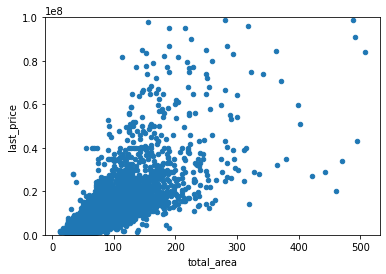

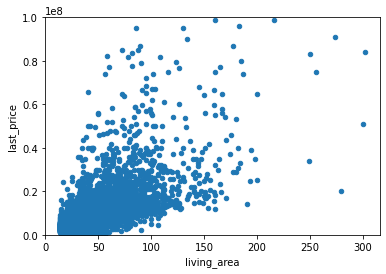

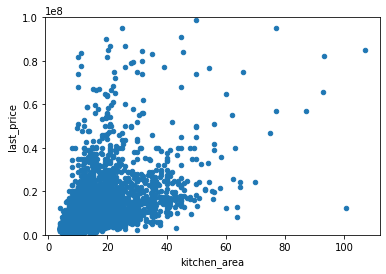

In [53]:
# графики зависимотси цены от указанных параметров

for col in ['total_area', 'living_area', 'kitchen_area']:
    data.plot(x=col, y='last_price', kind='scatter', ylim=(0, 10**8))

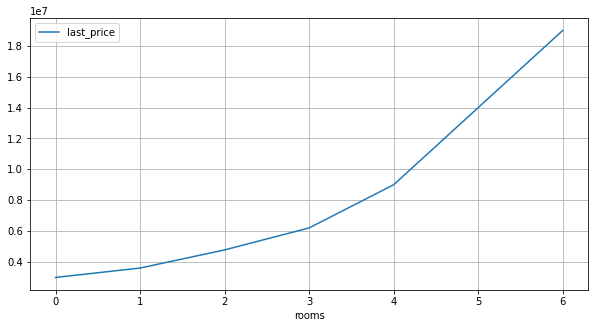

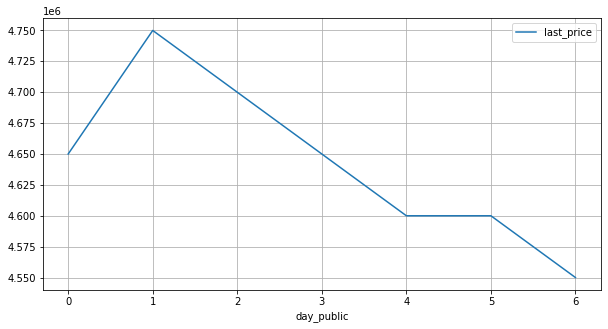

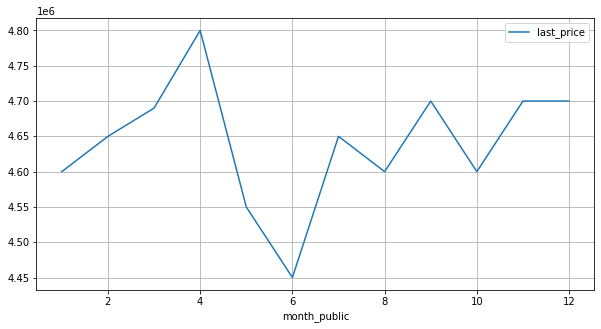

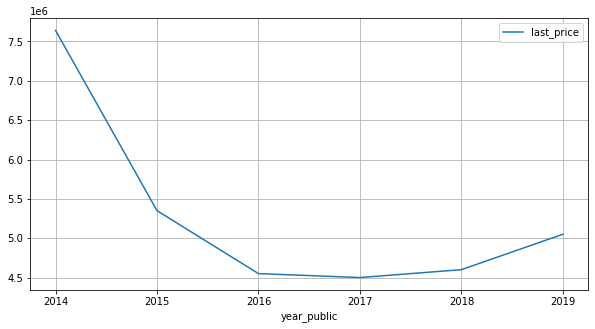

In [54]:
for col in ['rooms', 'day_public', 'month_public', 'year_public']:
    data.pivot_table(index=col, values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5))


In [55]:
data.pivot_table(index='floor_cat', values=['last_price'], aggfunc=['median'])

,median
,last_price
floor_cat,
другой,4850000.0
первый,3900000.0
последний,4300000.0


Самые дешевые квартиры на первом этаже. На последнем дороже, чем на первом, но дешевле, чем на других.

#### "Cчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделяем населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [56]:
# сводная таблица по городам со средней стоимостью метра и количеством объявлений
data_pivot_m = data.pivot_table(index='locality_name', values='price_per_sqtm', aggfunc=['count','mean'])

# переименовываем столбцы для удобства
data_pivot_m.columns=['count', 'mean_m']

# выводим топ-10 по количеству объявлений
top_ten = data_pivot_m.sort_values('count', ascending=False).head(10)
print(top_ten)


# выводим населённые пункты с минимальной и максимальной стоимостью квадратного метра
top_ten[(top_ten['mean_m'] == min(top_ten['mean_m']))|(top_ten['mean_m'] == max(top_ten['mean_m']))]


                   count         mean_m
locality_name                          
Санкт-Петербург    15418  114419.672855
посёлок Мурино       533   85446.339344
посёлок Шушары       425   77926.207140
Всеволожск           390   68675.856802
Пушкин               365  103046.435755
Колпино              335   75302.822323
Гатчина              306   68935.194838
посёлок Парголово    306   89762.325778
деревня Кудрово      293   92527.306322
Выборг               233   58070.254217


,count,mean_m
locality_name,,
Санкт-Петербург,15418,114419.672855
Выборг,233,58070.254217


#### Вычисление средней цены каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [57]:
data['centr_km']

0        16.0
1        18.0
2        13.0
3         6.0
4         8.0
         ... 
23693    34.0
23694     4.0
23695     NaN
23696     NaN
23697    10.0
Name: centr_km, Length: 23184, dtype: float64

Text(0, 0.5, 'Средняя стоимость квадратного метра')

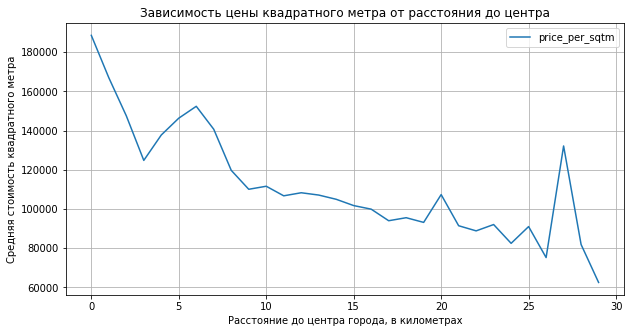

In [58]:
(data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='centr_km', values='price_per_sqtm')
    .plot(grid=True, figsize=(10, 5))
)

plt.title('Зависимость цены квадратного метра от расстояния до центра')
plt.xlabel('Расстояние до центра города, в километрах')
plt.ylabel('Средняя стоимость квадратного метра')

Text(0, 0.5, 'Средняя стоимость объекта')

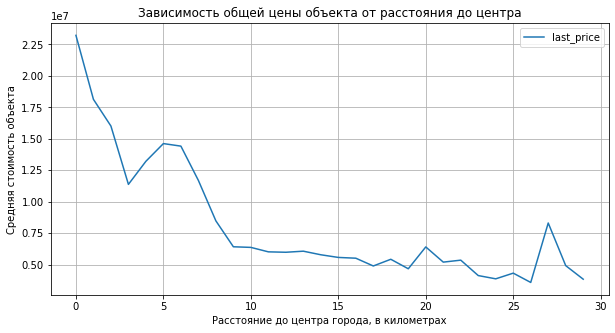

In [59]:
(data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='centr_km', values='last_price')
    .plot(grid=True, figsize=(10, 5))
)

plt.title('Зависимость общей цены объекта от расстояния до центра')
plt.xlabel('Расстояние до центра города, в километрах')
plt.ylabel('Средняя стоимость объекта')

### Общий вывод

Проведен анализ архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за период с 2014 по 2019 годы. Большую часть выбокри (15505 из 23699) составялют объекты из Санкт-Петербурга.

Первое, на что нужно обратить внимение - большое количество пропусков в данных, как картографических, так и пользовательских. Часть была дозаполнена исходя их логики (отсутствие балконов, отнесение к типу "апартаменты"). Для формирования окончательного вывода по исследованию требуется уточнение исходных данных по полям `living_area, kitchen_area, ceiling_height, days_exposition, cityCenters_nearest`.

Исходя из цели анализа - установить параметры объявлений о продаже, влияющие на рыночную стоимость объектов недвижимости, для отслеживания аномалий и мошеннической деятельности - на основании построенных графиков и подсчитанных коэффициентах корреляции, можно сделать следующие выводы:

1. Параметры, которые более всего влияют на общую стоимость:
    - `общая площать`
        Стоимость увеличивается при увеличении общей площади. Наиболее частое значение в диапазоне от 30 до 50 м2 - это однокомнатные квартиры и студии их больше всего, при этом есть объекты очень большой площади - их количество уменьшается с увеличением площади.
                
    - `жилая площадь`
        Зависит от общей, и соответственно тоже чем больше, тем выше стоимость. Ярко выражены три пика 18, 30 и 50 м2, можно предположить, что это характерно для самых массовых категорий: однокомнатные, двухкомнатные и трёхкомнатные квартиры
        
    - `количество комнат`
        Чем больше комнат, тем выше цена, что логично, т.к. количество комнат напрямую связано с жилой площадью.
        
    - `площадь кухни`
       Также как и жилая влияет на общую стоимость. При этом большинство кухонь небольшие - в диапазоне от 5 до 10 метров
    
    - `удаленность от центра`
        Стоимость объектов падает при удаленни от центра населенного пункта. В перелах нескольких километров от центра цена резко возрастает. Есть некоторые аномальные выбросы, на которые стоит обратить внимение - возможно тут присутстует элемент мошенничества.

2. Объекты проданные меньше, чем за 45 дней можно считать быстрыми, а дольше 232 дней - долгими

3. Зачастую объявления размещают по будням, по выходным реже. Январь, май и декабрь наименее популярные месяца, а в феврале, марте и апреле пиковые значения, с лета до декабря количество объявлений планомерно увеличивается.

4. Объекты на первом и последнем этажах встречаются реже остальных и их цена в среднем ниже. Самые дешевые квартиры на первом этаже. На последнем дороже, чем на первом, но дешевле, чем на других.


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод